<a href="https://colab.research.google.com/github/suumino/DataAlanysis/blob/main/Part_06_Working_With_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("data/train.csv")

In [3]:
len(data)

3947

In [4]:
data

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...
3942,1,20120502172717Z,"""you are both morons and that is never happening"""
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo..."
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ..."


In [5]:
import numpy as np
y_train = np.array(data.Insult)

In [6]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [7]:
text_train = data.Comment.tolist()

In [8]:
text_train[6]

'"Yeah and where are you now?"'

In [9]:
data_test = pd.read_csv("data/test_with_solutions.csv")

In [10]:
text_test, y_test = data_test.Comment.tolist(), np.array(data_test.Insult)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer()
cv.fit(text_train)

CountVectorizer()

In [13]:
len(cv.vocabulary_)

16469

In [14]:
cv.vocabulary_.keys()

dict_keys(['you', 'fuck', 'your', 'dad', 'really', 'don', 'understand', 'point', 'xa0', 'it', 'seems', 'that', 'are', 'mixing', 'apples', 'and', 'oranges', 'xc2', 'xa0majority', 'of', 'canadians', 'can', 'has', 'been', 'wrong', 'before', 'now', 'will', 'be', 'again', 'nunless', 're', 'supportive', 'the', 'idea', 'nothing', 'is', 'full', 'proof', 'or', 'perfect', 'so', 'take', 'chances', 'if', 'we', 'should', 'inadvertently', 'kill', 'son', 'daughter', 'then', 'them', 'breaks', 'always', 'regard', 'as', 'collateral', 'damage', 'like', 'in', 'wartime', 'sorry', 'but', 'xa0the', 'cheques', 'mail', 'listen', 'dont', 'wanna', 'get', 'married', 'to', 'man', 'women', 'do', 'what', 'would', 'bother', 'gay', 'people', 'got', 'stay', 'lane', 'let', 'god', 'nice', 'quick', 'judg', 'not', 'him', 'thought', 'wasnt', 'suppose', 'judge', 'xe1c', 'u1ea1n', 'xu', 'u1ed1ng', 'u0111', 'u01b0', 'u1eddng', 'bi', 'u1ec3u', 'xecnh', '2011', 'xf3', 'xf4n', 'ho', 'xe0', 'kh', 'xf4ng', 'nc', 'ng', 'xe2n', 'u1ed

In [15]:
X_train = cv.transform(text_train)

In [16]:
X_train

<3947x16469 sparse matrix of type '<class 'numpy.int64'>'
	with 100269 stored elements in Compressed Sparse Row format>

In [17]:
text_train[6]

'"Yeah and where are you now?"'

In [18]:
X_train[6, :].nonzero()[1]

array([  806,   983,  9576, 15388, 16367, 16397], dtype=int32)

In [19]:
X_test = cv.transform(text_test)

In [20]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=.01)

In [21]:
svm.fit(X_train, y_train)

LinearSVC(C=0.01)

In [22]:
svm.score(X_train, y_train)

0.8842158601469471

In [23]:
svm.score(X_test, y_test)

0.8367963732527389

In [24]:
coef = svm.coef_.ravel()
positive_coefficients = np.argsort(coef)[-25:]
negative_coefficients = np.argsort(coef)[:25]
interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


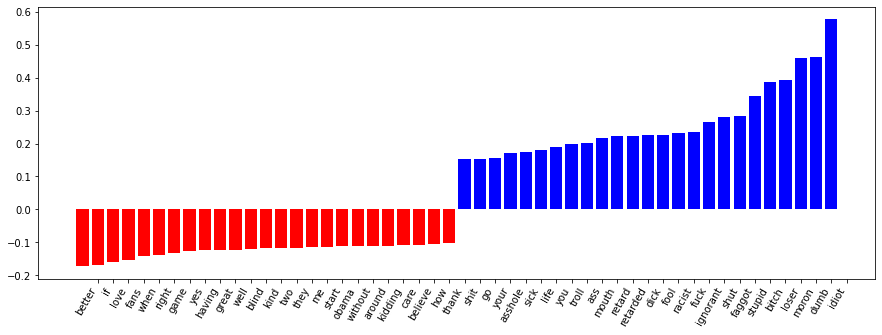

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.bar(np.arange(50), coef[interesting_coefficients], color=["red" if c < 0 else "blue" for c in coef[interesting_coefficients]])
feature_names = np.array(cv.get_feature_names())
plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipeline = Pipeline([('vectorizer', CountVectorizer()),
                     ('classifier', svm)])

In [28]:
pipeline.fit(text_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LinearSVC(C=0.01))])

In [29]:
pipeline.score(text_test, y_test)

0.8367963732527389

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'classifier__C': 10. ** np.arange(-3, 3)}
grid_search = GridSearchCV(pipeline, param_grid=param_grid)

In [33]:
grid_search.fit(text_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

GridSearchCV(estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', LinearSVC(C=0.01))]),
             param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [34]:
grid_search.score(text_test, y_test)

0.8413298073290517

In [35]:
param_grid = {'classifier__C': 10. ** np.arange(-3, 3),
              "vectorizer__ngram_range": [(1, 1), (1, 2)],
              "vectorizer__analyzer": [porter, somestemmer]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=3)

NameError: ignored

In [ ]:
grid_search.fit(text_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_